In [15]:
import os

example_func = '/Volumes/T7/BIDS-BRAINPLAYBACK-TASK2/derivatives/fmriprep23/sub-01/ses-01/func/sub-01_ses-01_task-02a_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz'
atlas_path = os.path.join('..','data','koelsch','Meta_analysis_C05_1k_clust_MNI.nii.gz')

# A coordinate-based meta-analysis of music-evoked emotions
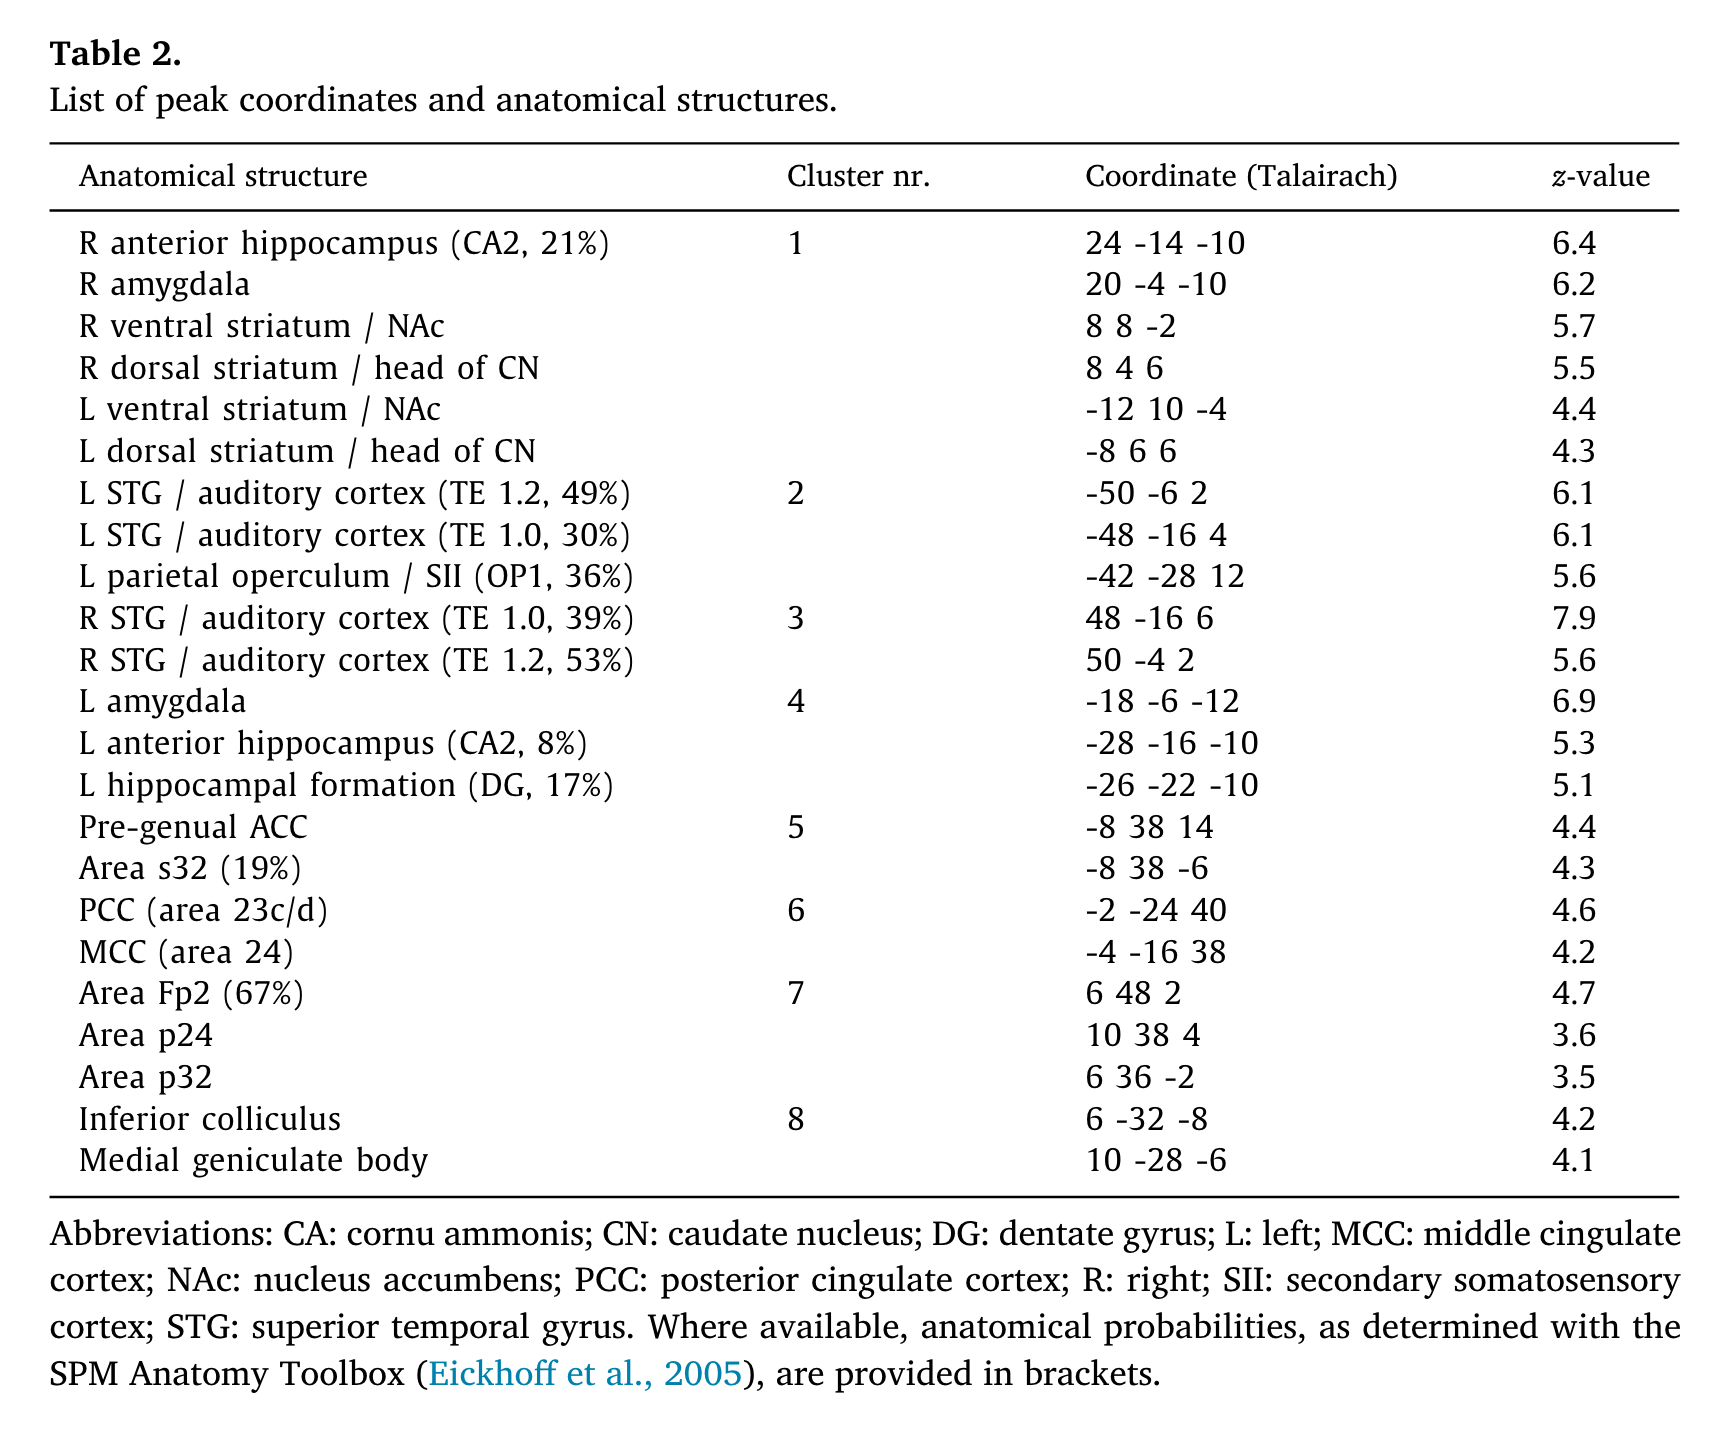

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/plotting/find_cuts.py:148: UserWarning: Could not determine cut coords: All voxels were masked by the thresholding. Returning the center of mass instead.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/plotting/displays/_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


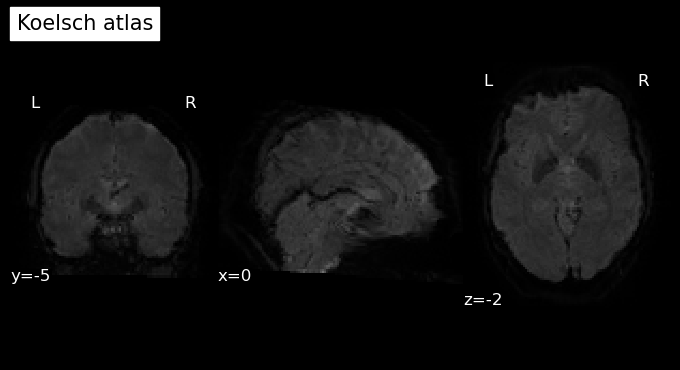

In [13]:
# plot atlas with nilearn
from nilearn import plotting
import nibabel as nb
#load first volume of example_func
example_func_vol1 = nb.load(example_func).slicer[...,0]
plotting.plot_roi(atlas_path, example_func_vol1, display_mode='ortho', draw_cross=False, title='Koelsch atlas')

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/resampling.py:756: UserWarning: Casting data from int32 to float32
  return resample_img(



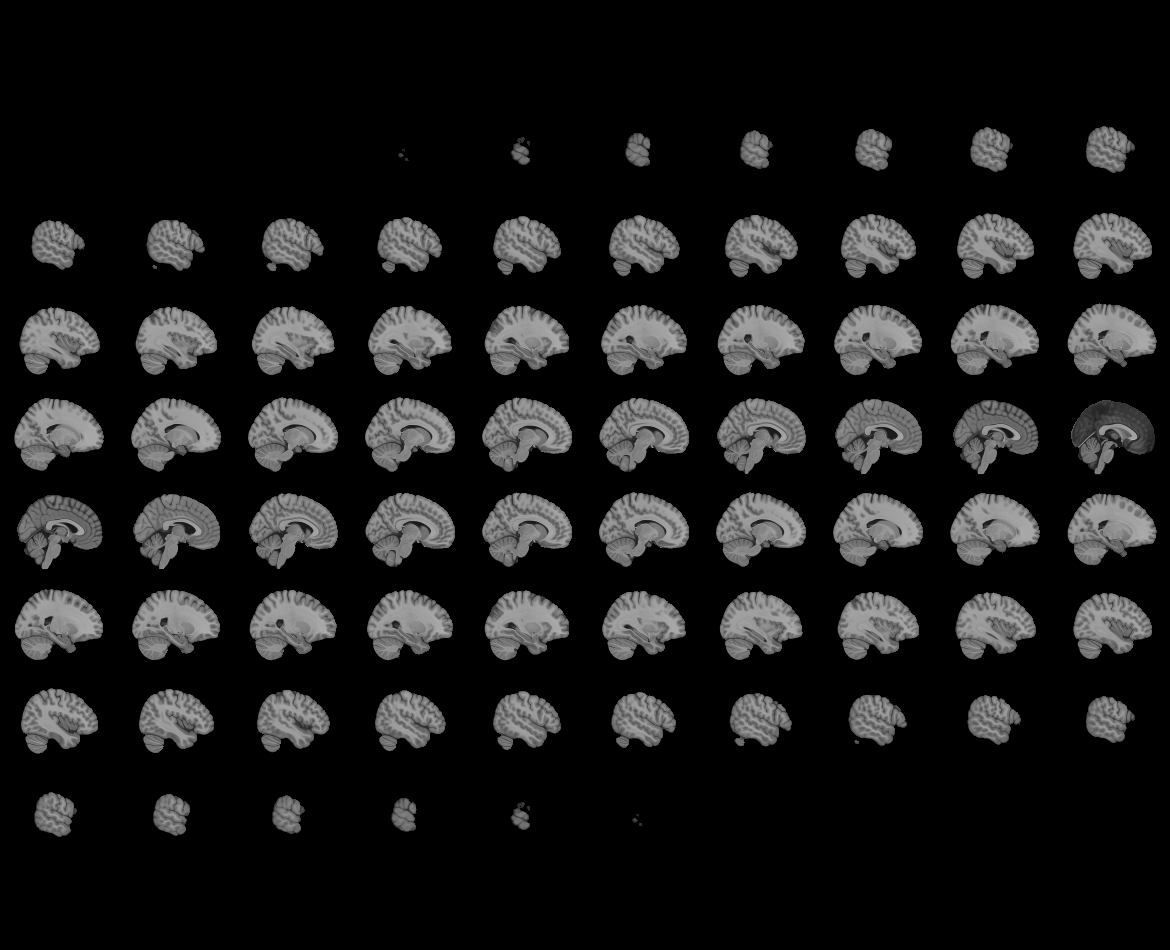
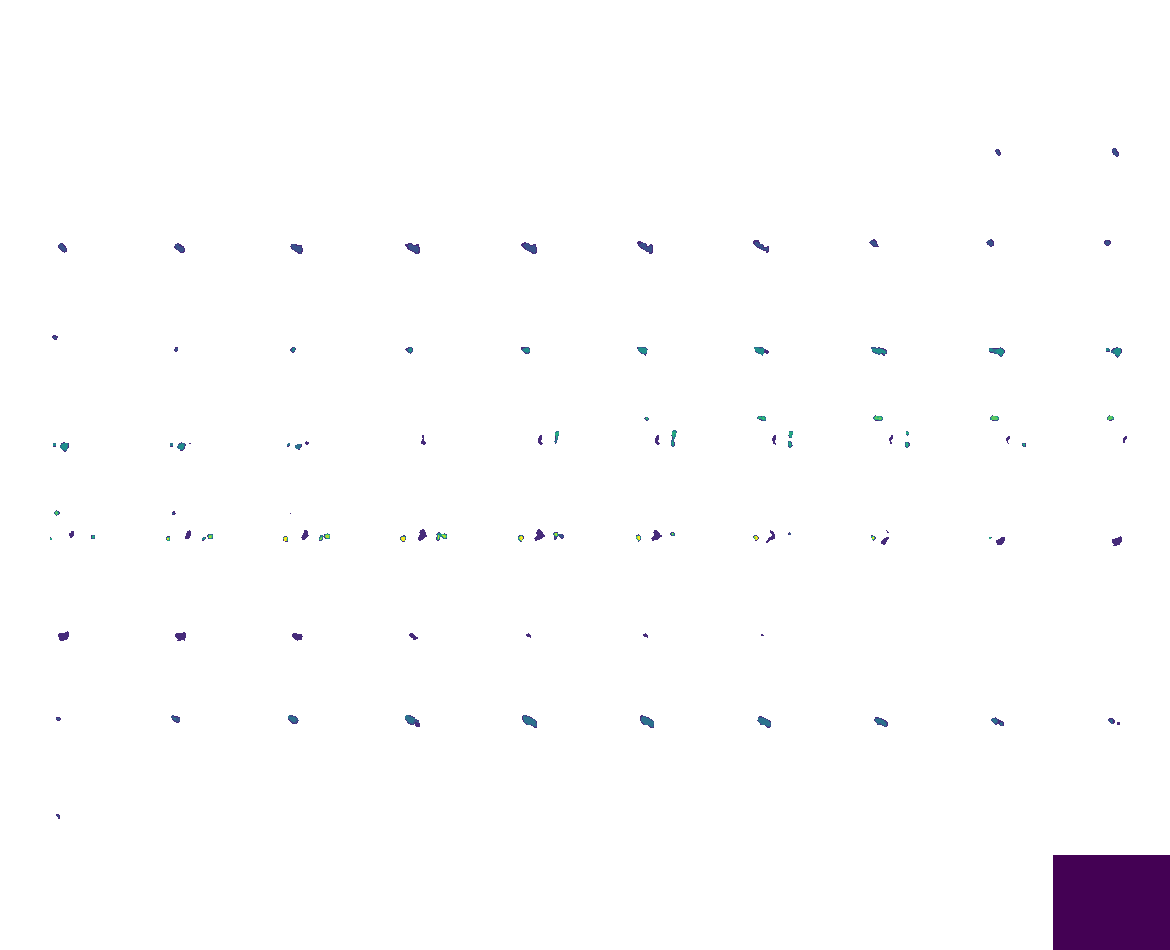

In [19]:
plotting.view_img(atlas_path, symmetric_cmap=False, cmap='viridis')

In [17]:
# fetch unique values in atlas_path
atlas_img = nb.load(atlas_path)
atlas_data = atlas_img.get_fdata()
unique_vals = list(set(atlas_data.flatten()))
print('Unique values in atlas:', unique_vals)

Unique values in atlas: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]


In [24]:
from nilearn.input_data import NiftiLabelsMasker
masker = NiftiLabelsMasker(maps_img=atlas_path, standardize=False)

# extract time series from atlas
time_series = masker.fit_transform(example_func)

In [25]:
# plot time series
import matplotlib.pyplot as plt
plt.plot(time_series[:, 2])

IndexError: index 2 is out of bounds for axis 1 with size 1